In [103]:
from math import sin, cos, log, pi, sqrt, exp, cosh, erf
import scipy
from integrate import Trapezoidal
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
def test_integral_solver(integrand, analytical, x, step=0.0001):
    integrator = Trapezoidal(step)
    f = lambda x : integrator(integrand, 0, x)

    print(f"x = {x}")
    print(f"Our numerical solution: {f(x)}")
    print(f"Scipy's numerical solution: {scipy.integrate.quad(integrand, 0, x)[0]}")

    def analytical_solution(x):
        return analytical(x) - analytical(step)

    print(f"Our analytical solution: {analytical_solution(x)}")


    x_axis = np.linspace(step, x, num=15)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(x_axis, [f(xi) for xi in x_axis], label = "Our numerical solution")
    ax1.set_title("Our numerical solution")
    ax2.plot(x_axis, [analytical_solution(xi) for xi in x_axis], label = "Our analytical solution")
    ax2.set_title("Our analytical solution")

    plt.show()

x = 2
Our numerical solution: 0.804775732631279
Scipy's numerical solution: 0.8047764893437559
Our analytical solution: 0.8047764893437559


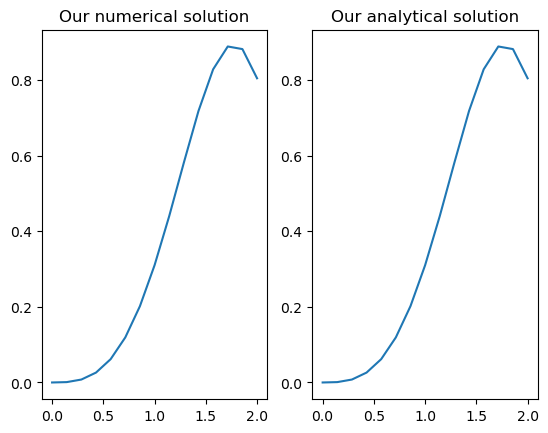

In [93]:
integrand = lambda t : sin(t**2)
x = 2
analytical = lambda x : sqrt(pi/2) * scipy.special.fresnel(sqrt(2/pi) * x)[0]

test_integral_solver(integrand, analytical, x, step=0.000001)

3.9903964548595865
(3.999999999999997, 1.1546319456101628e-14)
3.98
x = 4
Our numerical solution: 3.9969630923882393
Scipy's numerical solution: 3.999999999999997
Our analytical solution: 3.9936754446796634


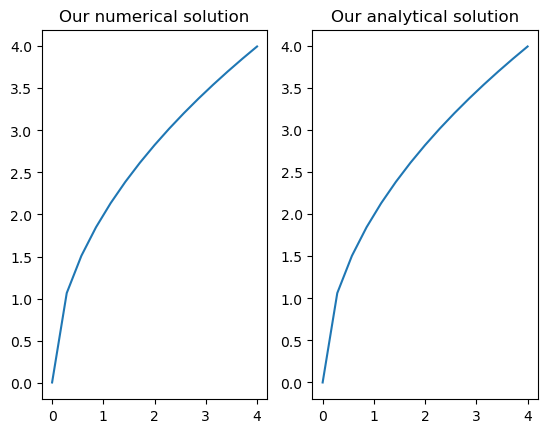

In [96]:
integrand = lambda t : 1 / sqrt(t)
x = 4
analytical = lambda x : 2 * sqrt(x)

test_integral_solver(integrand, analytical, x, step=0.00001)

x = 1
Our numerical solution: 0.999990810606595
Scipy's numerical solution: 0.9999999999999999
Our analytical solution: 0.9998748707453503


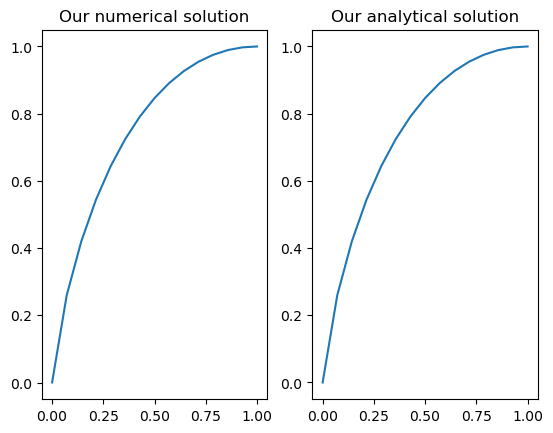

In [99]:
integrand = lambda t : -log(t)
x = 1
analytical = lambda x : x - x * log(x)

test_integral_solver(integrand, analytical, x, step=0.00001)

x = 5
Our numerical solution: -50.60846894766265
Scipy's numerical solution: -50.608889940182415
Our analytical solution: -50.60889994023241


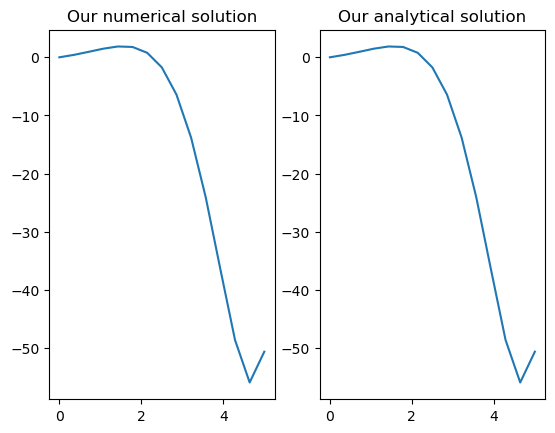

In [100]:
integrand = lambda t : exp(t) * cos(t)
x = 5
analytical = lambda x : exp(x) * (cos(x) + sin(x)) / 2 - 0.5

test_integral_solver(integrand, analytical, x, step=0.00001)

x = 1
Our numerical solution: 0.40865912439853197
Scipy's numerical solution: 0.40864369354821206
Our analytical solution: 0.40864369354821173


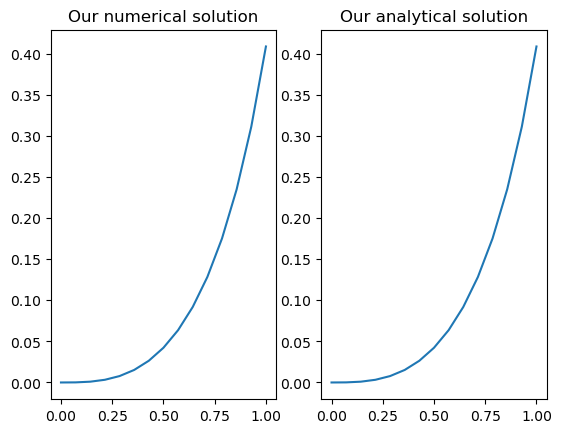

In [104]:
integrand = lambda t : t**2 * cosh(t**2)
x = 1
analytical = lambda x : (2 * (x * exp(x**2) - x * exp(-x**2)) - sqrt(pi) * (scipy.special.erfi(x) - erf(x)) ) / 8

test_integral_solver(integrand, analytical, x, step=0.00001)

x = 2
Our numerical solution: 2.105714500452286
Scipy's numerical solution: 2.1057142579335517
Our analytical solution: 2.1057030918977153


/tmp/ipykernel_6373/828343924.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print(f"Scipy's numerical solution: {scipy.integrate.quad(integrand, 0, x)[0]}")


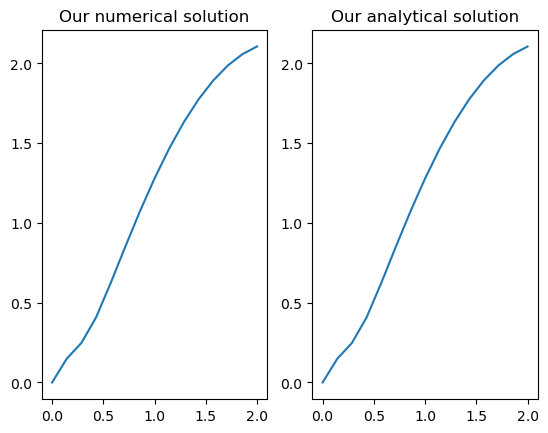

In [105]:
integrand = lambda t : sin(1/t) * sqrt(t) + cos(t)
x = 2
analytical = lambda x : sin(x) + (2 * sqrt(x) * (sin(1/x)*x + 2*cos(1/x)) + 2**(5/2) * sqrt(pi) * scipy.special.fresnel(sqrt(2 / (pi * x)))[0]) / 3

test_integral_solver(integrand, analytical, x, step=0.00001)

x = 2
Our numerical solution: 2.320150418751407
Scipy's numerical solution: 2.320150409527074
Our analytical solution: 2.1057030918977153


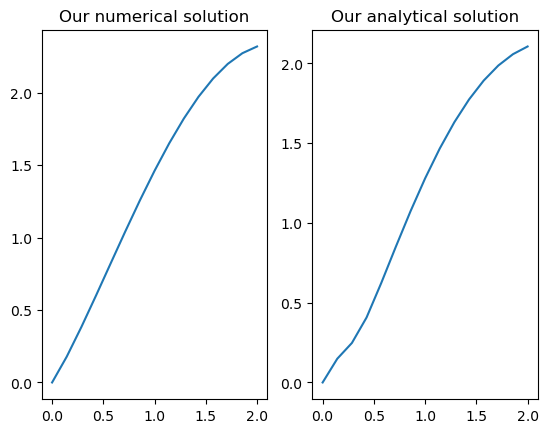

In [106]:
integrand = lambda t : sin(t) * sqrt(1/t) + cos(t)
x = 2
analytical = lambda x : sin(x) + (2 * sqrt(x) * (sin(1/x)*x + 2*cos(1/x)) + 2**(5/2) * sqrt(pi) * scipy.special.fresnel(sqrt(2 / (pi * x)))[0]) / 3

test_integral_solver(integrand, analytical, x, step=0.00001)